<a href="https://colab.research.google.com/github/avoyko/Linear-Algebra-Research-Work/blob/main/HSE_Linalg_Lab_Fall_2022_pilot_VoykoAndrey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная алгебра. Лабораторная работа 1, зима 2022, пилотный поток

В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [ ]:
# Запустите этот код


import scipy.linalg as sla
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных &mdash; это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [ ]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`.

*Умножение матриц* производится с помощью оператора `np.dot()`. Есть два варианта написания: `A.dot(B)` и `np.dot(A, B)`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` &mdash; это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` &mdash; это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

In [ ]:
A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` &mdash; это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

**И всё-таки задание**

В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

А сейчас мы в качестве примера создадим единичную матрицу:

In [ ]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

**Нулевая матрица  Z  размера  3×4**

In [ ]:
np.zeros((3,4), dtype = int)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

**Диагональная матрица 5×5**

In [ ]:
lst = [(i) for i in range(1,6)]
np.diag(lst)

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

**След**

In [ ]:
a = np.diag(lst)
np.trace(a)


15

**Обратная к ней матрица**

In [ ]:
sla.inv(a).round(2)

array([[ 1.  ,  0.  , -0.  ,  0.  , -0.  ],
       [ 0.  ,  0.5 , -0.  ,  0.  , -0.  ],
       [ 0.  ,  0.  ,  0.33,  0.  , -0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.25, -0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.2 ]])

**Случайная матрица**

In [ ]:
x = np.random.rand(4,5)
x

array([[0.96825809, 0.47832543, 0.11711744, 0.75695053, 0.91766004],
       [0.35252518, 0.23375048, 0.91930111, 0.0520685 , 0.05170058],
       [0.21551797, 0.35172691, 0.80946089, 0.90031882, 0.19830472],
       [0.4354557 , 0.81504533, 0.98529686, 0.38505162, 0.3607196 ]])

**Определитель подматрицы матрицы  X**

In [ ]:
from scipy import linalg
rows = [1,2]
columns = [0,1]
b = x[np.ix_(rows, columns)]
linalg.det(b)


0.07361516210278703

**Произведение транспонированной матрицы на данную**

In [ ]:
tr = x.T
tr.dot(x)

array([[1.29786739, 0.976265  , 1.0409832 , 1.11298674, 1.10657314],
       [0.976265  , 1.07144521, 1.3586781 , 1.0047406 , 0.8147771 ],
       [1.0409832 , 1.3586781 , 2.48486786, 1.24468177, 0.6709382 ],
       [1.11298674, 1.0047406 , 1.24468177, 1.53452396, 1.01474836],
       [1.10657314, 0.8147771 , 0.6709382 , 1.01474836, 1.01421629]])

## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [ ]:


def my_det(X):
    rows = len(X)
    cols = len(X[0])
    delta = 10**(-20)
    X = list(X)
    detr = float(1)
    for i in range(len(X)):
        X[i] = list(X[i])
    
    if rows==cols:
        for i in range(rows):
            cnt = i
            for j in range(i+1, rows):
                if abs(X[j][i])>abs(X[cnt][i]):
                    cnt = j
                    
            if abs(X[cnt][i])<delta:
                return 0
            
            tmp = X[i]
            X[i] = X[cnt]
            X[cnt] = tmp
            
            
            
            if i==cnt:
                pass
            else:
                detr*=-1
            detr*=X[i][i]
            
            for j in range(i+1, cols):
                X[i][j]/=X[i][i]
                
            for j in range(0,cols):
                if  abs(X[j][i])>delta and (j!=i):
                    for m in range(i+1, rows):
                        X[j][m]-=X[j][i]*X[i][m]
        
        return detr
    else:
        raise ValueError
# Запустите этот блок кода


                
        
        
        
    
        

Простая проверка:

In [ ]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(X)
print(my_det(X))

[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [ ]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')
        

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно. 

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

18.7 µs ± 5.41 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
243 µs ± 11.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
215 µs ± 22.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
166 ms ± 13.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
38.1 ms ± 2.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<ipython-input-80-0b31051900af>:30: RuntimeWarning: overflow encountered in double_scalars
  detr*=X[i][i]


3min 11s ± 615 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


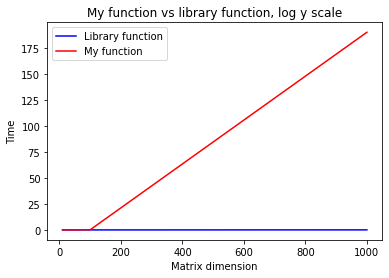

In [ ]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

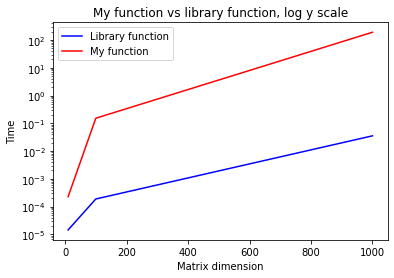

In [ ]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [ ]:
A = np.array([[1, 0], [10**20, 1]])
B = np.array([[10**(-20),1],[0, 1-10**20]])
print(A.dot(B))


[[1e-20 1]
 [1.0 1]]


In [ ]:
A = np.array([[1., 0.], [10**20., 1.]])
B = np.array([[(10.)**(-20),1.],[0., 1.-(10.)**20]])
print(A.dot(B))

[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
**Первый верен**

Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [ ]:
import numpy as np
import scipy.linalg as sla
from functools import lru_cache

def my_pascal(dim):
   
    P = np.zeros((dim, dim))
    
    for i in range(dim):
        for j in range(dim):
            if i==0 or j==0:
                P[i][j]=1
            else:
                P[i][j] = P[i][j-1]+P[i-1][j]
    
    
    # Your code here
    
    return P



Чему равен её определитель? Обязательно объясните свой ответ.

----
Определитель матрицы Паскаля равен 1. Поясню этот замечательный факт.
Давайте первую строку вычтем из оставшихся ${n-1}$ строк и заметим, что получили подматрицу размера ${(n-1)}\times{(n-1)}$, в которой каждый элемент равен элементу, стоявшему слева от него в исходной матрице. Так произошло в силу того, что каждый элемент матрицы Паскаля $P_{ij}$ равен $C_{i+j}^{i}$ и что для биномиальных коэффициентов выполняется следующее комбинаторное равенство: $C_{n}^{k} = C_{n-1}^{k-1} + C_{n}^{k-1}$. Теперь, после того как мы вычли первую строку из ${n-1}$ cтроки, проделаем такой же процесс со второй (т.е. вычтем ее из ${n-2}$ строк под ней). Проделывая такие операции с каждый строкой, мы получим верхнетреугольную матрицу с единицами на главной диагонали. Так как все преобразования строк были элементарными преобразованиями первого типа, то определитель матрицы не менялся. Следовательно, определитель матрицы просто равен  произведению диагональных элементов, т.е. в нашем случае произведению единиц.


А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [ ]:
sla.det(my_pascal(30))

-3.400444993542751e+51

Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

Не забудьте написать тесты, которые будут проверять корректность ваших функций.

**Задание 4.1** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [ ]:
#запустите ф-цию, чтобы сработал тест
import numpy as np
import random
eps = 1e-9
def prod_and_sq(A):
  a = np.diagonal(A)
  n = len(a)
  prod = a.prod(axis = 0)
  x = a*a.reshape((1,n))
  summ = x.sum()
  return prod, summ

       

**Тест**

In [ ]:
for i in range(10):
    n = random.randint(2,10)
    A = np.random.rand(n,n)
    summ = 0
    prod = 1
    for i in range(n):
        elem = A[i][i]
        summ+=elem**2
        prod*=elem
        
    res = prod_and_sq(A)
    if abs(res[0]-prod)<eps and abs(res[1]-summ)<eps:
        print('OK')
    else:
        print('Failed')

OK
OK
OK
OK
OK
OK
OK
OK
OK
OK


**Задание 4.2** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,m)}a_ib_i^T$$

In [ ]:
#запустите ф-цию, чтобы сработал тест
def f(A,B,k):
  x = B.shape[0]
  y = B.shape[1]
  num = min(x,k)
  res = np.sum(np.matmul(A.T.reshape(y,x,1), B.T.reshape(y,1,x)).reshape(y,x,x)[:num], axis = 0)
  return res




**Тест**

In [ ]:
import random

def test(A,B,k):
    if y <= k:
        return np.dot(A,B.T)
    else:
        A = A[:,:k]
        B = B[:,:k]
        return np.dot(A,B.T)

global y, x
for i in range(15):
    y = random.randint(2,10)
    x = random.randint(2,10)
    k = random.randint(2,10)
    A = np.random.rand(x,y)
    B = np.random.rand(x,y)
    if f(A,B,k).all()==test(A,B,k).all():
        print('OK')
    else:
        print('Failed')

OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK


**Задание 4.3** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [ ]:
#запустите ф-цию, чтобы сработал тест
def get_diag(A, B):
    l = len(A)
    b = B.T
    return np.matmul(A.reshape(l, 1, l), b.reshape(l, l, 1)).reshape(l)





**Тест**

In [ ]:
import numpy as np
import random


def test(A,B):
    C = A.dot(B)
    lst = []
    for i in range(len(A)):
        lst.append(C[i][i])
    return np.array(lst)


for i in range(15):
    x = random.randint(2,10)
    A = np.random.rand(x,x)
    B = np.random.rand(x,x)
    if get_diag(A,B).all()==test(A,B).all():
        print('OK')
    else:
        print('Failed')


OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

**Внимание!** При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Решения, в которых в какой-либо момент работа происходит не с комплексным числом как таковым, а с парой вещественных, будут оцениваться нулём баллов. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

Ваша функция должна работать для любой точки корректно.

**Задание 5.2** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка). Ваша функция должна работать для любой точки корректно.

**Задание 5.3** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)). Ваша функция должна работать для любой точки корректно

In [ ]:
def shrink_rotate(x, a, coef=1., angle=0.):
    vect = x - a
    vect*=coef*(np.sin(angle)*1j + np.cos(angle))
    vect+=a
    return vect
    
def shrink_rotate_conj(x, a, coef=1., angle=0.):
     vect = x - a
     vect*=coef*(np.sin(angle)*1j + np.cos(angle))
     vect = a+vect.conjugate()
     return vect
 
    
def geometric_inverse(x, a, r):
    vect = x-a
    coef = (r**2)/vect.conjugate()
    vect = a + coef
    return vect

**Задание 5.4** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

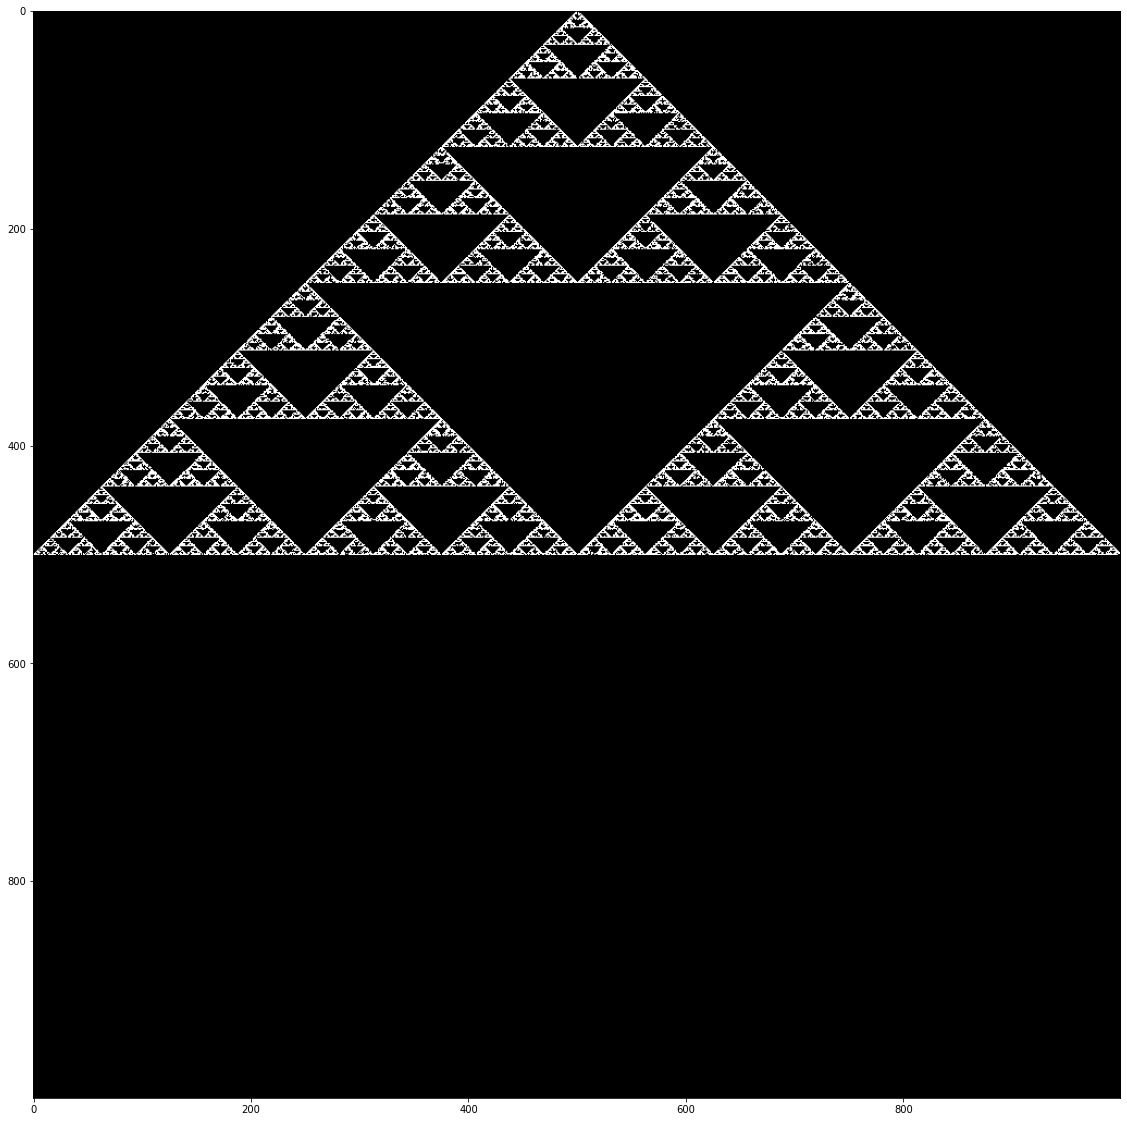

In [ ]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
sq = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        m,n = 500-round(500*z.imag), 500-round(500*z.real)
        if min(m, n)>=0 and 1000>max(m,n):
            sq[m][n] = 1
plt.figure(figsize=(20, 20))
plt.imshow(sq, cmap='gray')           

**Задание 5.5 (со звёздочкой)** Попробуйте объяснить, почему получается именно эта фигура.

---
Ваше объяснение

**Задание 5.6** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

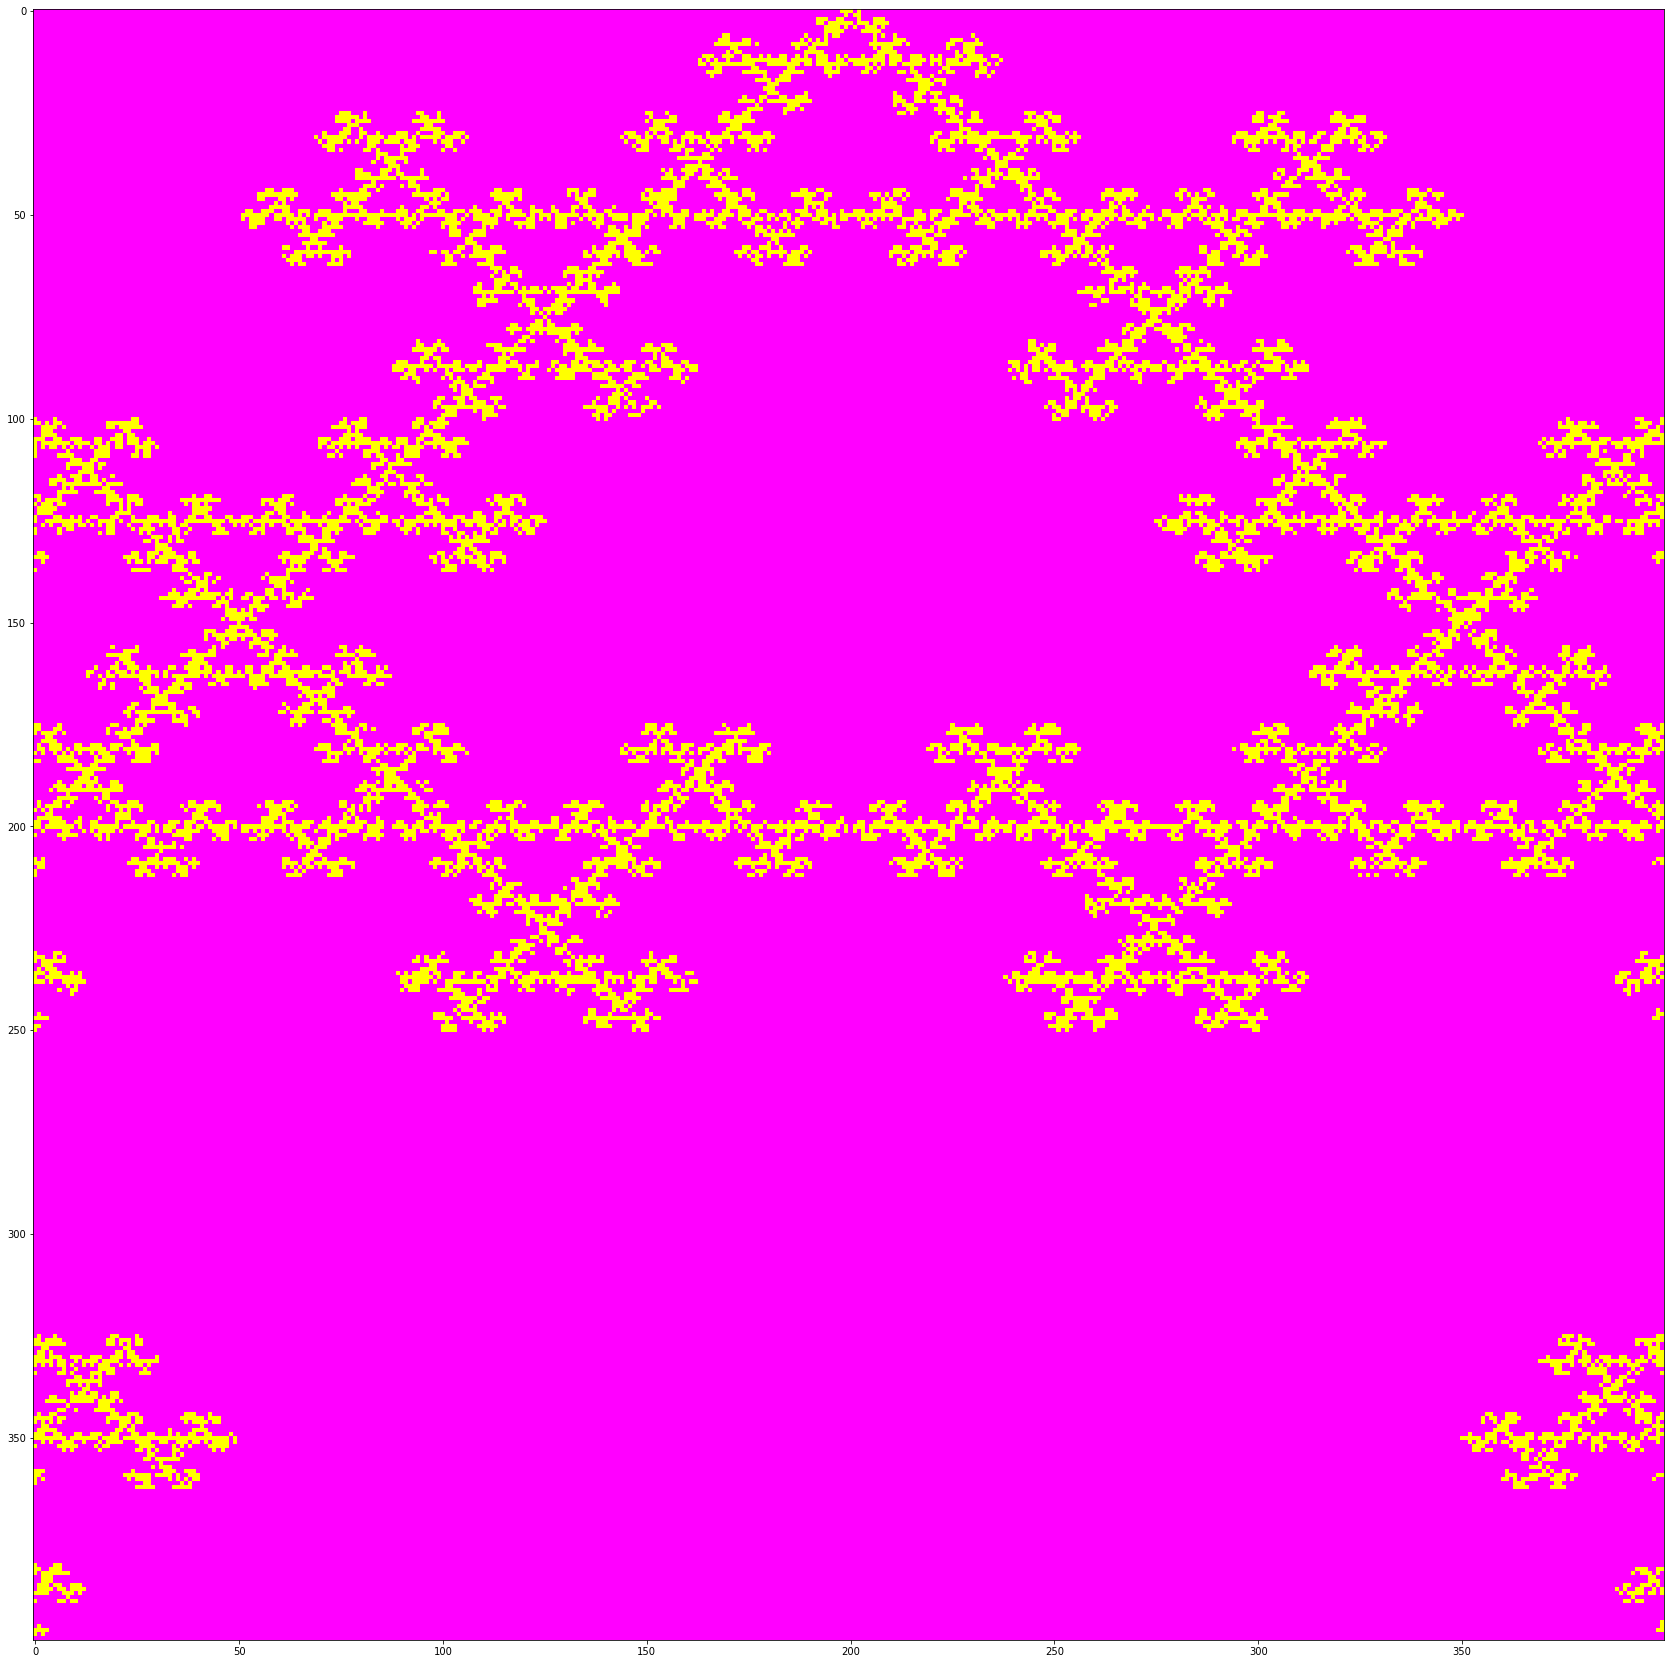

In [ ]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=np.pi)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=np.pi)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=np.pi))
]
sq = np.zeros((400, 400))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        m,n = 200-round(200*z.imag), 200-round(200*z.real)
        if min(m, n)>=0 and 400>max(m,n):
            sq[m][n] = 1
plt.figure(figsize=(150, 30))
plt.imshow(sq, cmap='spring') 

## Часть 6. Функции от матриц

Пусть $A$ -- некоторая квадратная матрица. В некоторых приложениях возникает необходимость вычислить какую-нибудь сложную функцию от матрицы. Например, экспоненту или синус. Это можно делать с помощью разложения в ряд, но мы пойдем другим путем. В этой задаче мы продемонстрируем другой метод:

1) Посчитаем какой-нибудь аннулирующий многочлен для матрицы $A$. Пусть это будет $f(x)$.

2) Разложим многочлен $f$ на множители следующим образом $f(x) = (x-\lambda_1)^{k_1}\ldots (x-\lambda_r)^{k_r}$.

3) Пусть $\phi$ -- гладкая функция, значение которой мы хотим посчитать на матрице $A$. Найдем какой-нибудь многочлен $g_\phi$ степени меньше, чем степень $f$ со следующими свойствами: $g_\phi(\lambda_i)^{(d)} = \phi^{(d)}(\lambda_i)$ для всех $0 \leqslant d < k_i$. То есть во всех корнях $f$ все производные $g_\phi$ до кратности корня должны совпасть с производными $\phi$.

4) Утверждается, что $\phi(A) = g_\phi(A)$ (и в частности не зависит от выбора многочлена $g_\phi$ с указанными свойствами).

**А теперь задание**

Каждая группа будет работать со своей матрицей:

- у группы 221:

`A = np.array([[-1,1,2,-2],[-5,4,3,-4],[0,0,2,-1],[1,0,-1,1]])`

- у группы 222:

`A = np.array([[-3,5,-5,-7],[-10,12,-9,-15],[5,-2,-2,1],[-9,7,-2,-7]])`

- у группы 223:

`A = np.array([[6,-3,-5,-3],[-7,4,6,4],[9,-3,-6,-5],[-3,-2,0,2]])`

- у группы 224:

`A = np.array([[-6,-4,3,6],[1,-3,0,-1],[-1,-1,-5,0],[1,1,1,-4]])`

 

Посчитайте указанным способом:
 

1) $B = e^A$.
 
2) $S = \sin A$.

3) $T = \cos A$.

4) Проверьте равенство $S^2 + T^2 = E$, то есть $\sin^2 A + \cos^2 A = E$.

5) $\ln (B)$ и проверьте, что полученная матрица совпадает с $A$.

Заметим, что для взятия производных и нахождения корней многочлена не обязательно использовать программы. 

Зануляющий многочлен для матрицы А



In [ ]:
np.poly(A)

array([  1.,  18., 121., 360., 400.])

То есть он равен $f(x) = x^4 + 18x^3 + 121x^2 + 360x + 400 $ или что то же самое $f(x) = (x+4)^2(x+5)^2$. 
Далее, пусть искомый многочлен $g(x) = d(x-a)(x-b)(x-c)$. Тогда в силу приведенного алгоритма имеем четыре уравнения:

\begin{cases}
-64a + 16b - 4c + d = e^{-4}\\
-125a + 25b - 5c + d = e^{-5}\\
48a - 8b + c  = e^{-4}\\
75a + 10b + c = e^{-5}
\end{cases}

Решим полученную систему:

In [ ]:
matrix = np.array([[-64., 16., -4., 1.],
                   [-125., 25., -5., 1.],
                  [48., -8., 1., 0.],
                  [75., -10., 1., 0.]])

eq = sla.solve(matrix, np.array([np.e **(-4.), np.e**(-5.), 
                                np.e ** (-4.), np.e ** (-5.)]))
print(eq) #получили коэффициенты 

[0.0018982  0.03141457 0.17851853 0.35124152]


Найдем теперь матрицу $B = e^A$, подставив коэффициенты списка eq в многочлен  $g(x)$.

In [ ]:
A = np.array([[-6,-4,3,6],[1,-3,0,-1],[-1,-1,-5,0],[1,1,1,-4]])
eq = sla.solve(matrix, np.array([np.e **(-4.), np.e**(-5.), 
                                np.e ** (-4.), np.e ** (-5.)]))
B = eq[0] * matrix_power(A, 3) + eq[1] * matrix_power(A, 2) + eq[2] * matrix_power(A, 1) + eq[3] * np.eye(4)
print(B)

[[ 1.11022302e-16 -3.17915329e-02  3.66312778e-02  6.16848637e-02]
 [ 6.73794700e-03  1.53740961e-02  1.15776919e-02  9.67948978e-03]
 [-6.73794700e-03  2.94154278e-03 -1.15776919e-02 -2.79951287e-02]
 [ 6.73794700e-03 -2.94154278e-03  2.98933308e-02  4.63107676e-02]]


Найдем $S=sinA$

In [ ]:
eq = sla.solve(matrix, np.array([np.sin(-4.), np.sin(-5.), 
                                np.cos(-4.), np.cos(-5.)]))
S = eq[0] * matrix_power(A, 3) + eq[1] * matrix_power(A, 2) + eq[2] * matrix_power(A, 1) + eq[3] * np.eye(4)
S

array([[ 0.67526209, -0.64886478, -0.57210321, -0.20690062],
       [ 0.28366219,  2.01203261, -0.93730581, -1.70675196],
       [-0.28366219, -1.25523012,  2.34775192,  2.36039558],
       [ 0.28366219,  1.25523012, -1.59094943, -1.60359308]])

Найдем $T=cosA$

In [ ]:
eq = sla.solve(matrix, np.array([np.cos(-4.), np.cos(-5.), 
                                np.sin(4.), np.sin(5.)]))
T = eq[0] * matrix_power(A, 3) + eq[1] * matrix_power(A, 2) + eq[2] * matrix_power(A, 1) + eq[3] * np.eye(4)
T

array([[ 1.24258646,  3.81407863, -2.65303258, -5.50818693],
       [-0.95892427, -1.65580483,  0.20212178,  1.18266452],
       [ 0.95892427,  1.00216121, -0.0989629 , -0.42586203],
       [-0.95892427, -1.00216121, -0.55468072, -0.22778159]])

Проверим равенство  $S^2 + T^2 = E$

In [ ]:
S.dot(S) + T.dot(T)

array([[ 1.00000000e+00,  6.72795153e-14, -1.87627691e-14,
        -1.04770359e-13],
       [-1.12132525e-14,  1.00000000e+00, -1.55431223e-15,
         1.28785871e-14],
       [ 9.10382880e-15, -5.32907052e-15,  1.00000000e+00,
        -1.06581410e-14],
       [-1.40998324e-14,  8.88178420e-16,  4.44089210e-16,
         1.00000000e+00]])

Найдем $\ln (B)$ и проверим, что полученная матрица совпадает с A. Найдем зануляющий многочлен для B.

In [ ]:
np.roots(np.poly(B))

array([0.01831564+1.86437094e-10j, 0.01831564-1.86437094e-10j,
       0.00673794+0.00000000e+00j, 0.00673795+0.00000000e+00j])

Невооруженным взглядом видно, что корни зануляющего многочлена матрицы B - это  $e^{-4} $ $ и $ $e^{-5}$. То есть зануляющий многочлен для матрицы B равен $f^*(x) = (x-e^{-4})^2(x-e^{-5})^2$. 
Далее пусть, искомый многочлен $g^*(x) = d(x-a)(x-b)(x-c)$. Тогда в силу приведенного алгоритма имеем четыре уравнения:

\begin{cases}
ae^{-12} + e^{-8}b + e^{-4}c + d = -4\\
ae^{-15} + e^{-10}b + e^{-5}c + d = -5\\
3ae^{-8} + 2e^{-4}b + c  = e^4\\
3ae^{-10} + 2e^{-5}b + c  = e^5
\end{cases}

Решим полученную систему:

In [ ]:
matrix = np.array([[np.e ** (-12.), np.e ** (-8.), np.e ** (-4.), 1.],
                   [np.e ** (-15.), np.e ** (-10.), np.e ** (-5.), 1.],
                    [3. * np.e ** (-8.), 2. * np.e ** (-4.), 1., 0.],
                    [3. * np.e ** (-10.), 2. * np.e ** (-5.), 1., 0.]])

eq = sla.solve(matrix, np.array([-4., -5., 
                                np.e ** (4.), np.e ** (5.)]))
print(eq) #получили коэффициенты 

[ 2.25788123e+05 -1.25367452e+04  2.86604713e+02 -6.43102913e+00]


Найдем теперь матрицу $C = lnB$.

In [ ]:
eq = sla.solve(matrix, np.array([-4., -5., 
                                np.e ** (4.), np.e ** (5.)]))
C = eq[0] * matrix_power(B, 3) + eq[1] * matrix_power(B, 2) + eq[2] * matrix_power(B, 1) + eq[3] * np.eye(4)
print(C)

[[-6.00000000e+00 -4.00000000e+00  3.00000000e+00  6.00000000e+00]
 [ 1.00000000e+00 -3.00000000e+00  3.01980663e-14 -1.00000000e+00]
 [-1.00000000e+00 -1.00000000e+00 -5.00000000e+00 -3.37507799e-14]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 -4.00000000e+00]]


Ура! Получили матрицу $A$ !

Теперь попробуем поиграться с матрицами по-другому.

1) Возьмите матрицу $A$ из предыдущего задания и посчитайте $e^A$ с помощью подстановки в следующий ряд $e^x = \sum_{k = 0}^\infty \frac{x^k}{k!}$. Вычисление надо проводить так, надо считать сумму $\sum_{k = 0}^n \frac{A^k}{k!}$ до тех пор, пока максимум коэффициентов $A^{k+1} / (k+1)!$ не будет меньше заданной точности. Подумайте, как лучше организовать вычисления для подсчета частичной суммы.

2) Возьмите случайную матрицу $A$ размером $10$ на $10$ и найдите $\sin^2 A + \cos^2 A$ воспользовавшись рядами $\sin x = \sum_{k=0}^\infty \frac{(-1)^k x^{2k + 1}}{(2k + 1)!}$ и $\cos x = \sum_{k=0}^\infty \frac{(-1)^kx^{2k}}{(2k)!}$. Проверьте, получилась ли единичная матрица.

 Найдем $\sum_{k = 0}^n \frac{A^k}{k!}$ 

In [ ]:
finish = np.zeros((4, 4))
matrix = np.eye(4)
k = 0
eps = 10.**(-30)
while abs(matrix.max() -  matrix.min()) >= eps:
    finish += matrix
    k+=1
    matrix = matrix.dot(A)
    matrix /= k
finish


array([[-1.14761508e-15, -3.17915329e-02,  3.66312778e-02,
         6.16848637e-02],
       [ 6.73794700e-03,  1.53740961e-02,  1.15776919e-02,
         9.67948978e-03],
       [-6.73794700e-03,  2.94154278e-03, -1.15776919e-02,
        -2.79951287e-02],
       [ 6.73794700e-03, -2.94154278e-03,  2.98933308e-02,
         4.63107676e-02]])

С высокой точностью получившаяся матрица совпадает с $B$.

Найдем $\sin^2 A + \cos^2 A$

In [ ]:
import random
A = np.random.rand(10,10)
matrix = np.eye(10)
k = 1
eps = 10.**(-10)
sin = np.zeros((10,10))
cos = np.zeros((10,10))
matrix_sin = A.copy()
matrix_cos = np.eye(10)
while abs(matrix_cos.max()-matrix_cos.min()) >= eps or abs(matrix_sin.max()-matrix_sin.min()) >= eps:
    k+=2

    cos += matrix_cos
    matrix_cos = (-1)*matrix_cos.dot(A.dot(A))
    matrix_cos /= (k-2)*(k-1)

    sin += matrix_sin
    matrix_sin = (-1)*matrix_sin.dot(A.dot(A))
    matrix_sin /= (k-1)*k

    
  
print(sin.dot(sin)+cos.dot(cos))


[[1.00000000e+00 1.48191182e-11 1.48331347e-11 1.53107249e-11
  1.30626621e-11 1.38348222e-11 1.69030345e-11 1.23294708e-11
  1.37680145e-11 1.32576172e-11]
 [1.25290889e-11 1.00000000e+00 1.07513026e-11 1.10966236e-11
  9.46609457e-12 1.00231767e-11 1.22464122e-11 8.93386060e-12
  9.97570776e-12 9.60842517e-12]
 [1.85529370e-11 1.59067759e-11 1.00000000e+00 1.64307179e-11
  1.40158996e-11 1.48425291e-11 1.81392401e-11 1.32318566e-11
  1.47752921e-11 1.42276017e-11]
 [1.75478798e-11 1.50449653e-11 1.50582324e-11 1.00000000e+00
  1.32616140e-11 1.40427114e-11 1.71544029e-11 1.25183475e-11
  1.39748213e-11 1.34579015e-11]
 [1.49356638e-11 1.28029809e-11 1.28154241e-11 1.32265639e-11
  1.00000000e+00 1.19465549e-11 1.45977674e-11 1.06517850e-11
  1.18931809e-11 1.14527415e-11]
 [1.42980072e-11 1.22543087e-11 1.22666322e-11 1.26600397e-11
  1.08018594e-11 1.00000000e+00 1.39750433e-11 1.01949282e-11
  1.13828391e-11 1.09644516e-11]
 [1.71186121e-11 1.46706258e-11 1.46841983e-11 1.51615526e

Снова победа! Данная матрица действительно приближает матрицу $E$

## Часть 7 (бонус). Метод Гаусса или обратные матрицы?

Пусть нам дано матричное уравнение $Ax = B$, где $A$ &mdash; матрица размера $n\times n$, а $B$ &mdash; матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и одинаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000; например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000; например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимание на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.